#Step 0 - Setup the learning environment

To begin, we import some library modules and functions that we will use.   

Numpy is a collection of math functions including various matrix operations - see http://www.numpy.org/.   Matplotlib is a 2D plotting library  - see https://matplotlib.org/.

In [6]:
"""
mlp_bp_ann.py

Backpropagation tutorial using a two layer ANN, without
the aid of additional NN libraries. 
This two-layer ANN has one layer of hidden nodes that allows the model to develop
non-linear functions

The program uses  Numpy for faster matrix operations and 
Matplotlib for plotting the training error per epoch

"""

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

print("The enviriment is ready.")

The enviriment is ready.


#Step 1 - Create the training data.
The data can be examples of any simple two variable boolean logic function such as OR, AND, or XOR.



In [7]:
# Define the function inputs and target output values: bias row, x1 row, x2 row
data_in = np.array([(1, 1, 1, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
#target = np.array([0, 1, 1, 1])  # OR
#target = np.array([0, 0, 0, 1])  # AND
target = np.array([0, 1, 1, 0])  # XOR

print(data_in.T)
print(target)

[[1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]]
[0 1 1 0]


#Step 2 - Configure the neural network architecture 
Define a back-propagation neural network with one hidden layer of two nodes and one output node.  


In [8]:
# Set the learing parameters
learning_rate = 0.1
momemtum = 0.0
num_epochs = 20000

# Set the dimensions of the input, hidden, and output layers
size_in = 2
size_hidden = 2  # Can be anything - larger will take longer
size_out = target.ndim

# Set the seed value of the random number generator
random_seed = 2
np.random.seed(random_seed)

# Initialize the network weights, and place to store previous epoch weights
weight_out = np.random.rand(size_out, size_hidden + 1) - 0.5
weight_hidden = np.random.rand(size_hidden, size_in + 1) - 0.5

weight_hidden_prev = np.zeros(weight_hidden.shape)
weight_out_prev = np.zeros(weight_out.shape)

# Initialize a vector to store the train errors for each epoch
error_log = np.zeros([num_epochs])

print("Outout node initial weights:")
print(weight_out)
print("Hidden node initial weights:")
print(weight_hidden)

Outout node initial weights:
[[-0.0640051  -0.47407377  0.04966248]]
Hidden node initial weights:
[[-0.06467761 -0.0796322  -0.16966518]
 [-0.29535137  0.11927097 -0.20034533]]


#Step 3 - Fit the data to the model
The model uses the mean squared error (MSE) loss function, which works well with the sigmoid activation output nodes. 
It uses the gradient descent weight update algorithm.


In [9]:
for i in range(0, num_epochs):

    # Compute the predicted output for the hidden layer, then adding bias
    predicted_h = 1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))
    predicted_h = np.concatenate((np.ones([1, data_in.shape[1]]), predicted_h), axis=0)

    # Compute the output of network
    predicted_out = 1 / (1 + np.exp(np.dot(-weight_out, predicted_h)))

    # Compute the derivatives for the weight updates
    deriv_out = (predicted_out * (1 - predicted_out)) * (target - predicted_out)
    deriv_h = (predicted_h * (1 - predicted_h)) * (weight_out.T * deriv_out)

    # Compute the update to the input to hidden node weights
    deriv_weight_h = learning_rate * np.dot(
        data_in, deriv_h[1:].T).T + momemtum * weight_hidden_prev
    weight_hidden = weight_hidden + deriv_weight_h
    weight_hidden_prev = deriv_weight_h

    # Compute the update to the hidden to output node weights
    deriv_weight_out = learning_rate * np.dot(
        predicted_h, deriv_out.T).T + momemtum * weight_out_prev
    weight_out = weight_out + deriv_weight_out
    weight_out_prev = deriv_weight_out

    # Compute the error (loss) of the network for this epoch 
    predicted_out_err = 1 / (1 + np.exp(np.dot(-weight_out, np.concatenate(
        (np.ones([1, 4]), (1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))))))))
    error_log[i] = 0.5 * ((predicted_out_err - target) ** 2).mean(axis=None)
    if (i % 50) == 0:
        # print('XOR bias momentum MSE: {0}'.format(error_log[i]))
        print("Iter: %d, MSE: %8.7f" % (i, error_log[i]))


Iter: 0, MSE: 0.1269178
Iter: 50, MSE: 0.1250502
Iter: 100, MSE: 0.1249946
Iter: 150, MSE: 0.1249928
Iter: 200, MSE: 0.1249926
Iter: 250, MSE: 0.1249925
Iter: 300, MSE: 0.1249924
Iter: 350, MSE: 0.1249922
Iter: 400, MSE: 0.1249921
Iter: 450, MSE: 0.1249919
Iter: 500, MSE: 0.1249918
Iter: 550, MSE: 0.1249916
Iter: 600, MSE: 0.1249915
Iter: 650, MSE: 0.1249913
Iter: 700, MSE: 0.1249912
Iter: 750, MSE: 0.1249910
Iter: 800, MSE: 0.1249908
Iter: 850, MSE: 0.1249906
Iter: 900, MSE: 0.1249905
Iter: 950, MSE: 0.1249903
Iter: 1000, MSE: 0.1249901
Iter: 1050, MSE: 0.1249899
Iter: 1100, MSE: 0.1249897
Iter: 1150, MSE: 0.1249895
Iter: 1200, MSE: 0.1249893
Iter: 1250, MSE: 0.1249891
Iter: 1300, MSE: 0.1249888
Iter: 1350, MSE: 0.1249886
Iter: 1400, MSE: 0.1249884
Iter: 1450, MSE: 0.1249881
Iter: 1500, MSE: 0.1249879
Iter: 1550, MSE: 0.1249876
Iter: 1600, MSE: 0.1249873
Iter: 1650, MSE: 0.1249871
Iter: 1700, MSE: 0.1249868
Iter: 1750, MSE: 0.1249865
Iter: 1800, MSE: 0.1249862
Iter: 1850, MSE: 0.12498

#Step 4 - Evaluate the model on the training set and print the results.
And then plot the training error for each epoch through the data.

Target outputs: [0 1 1 0]
Predicted outputs: [[0.03442355 0.96212807 0.96229201 0.04776223]]


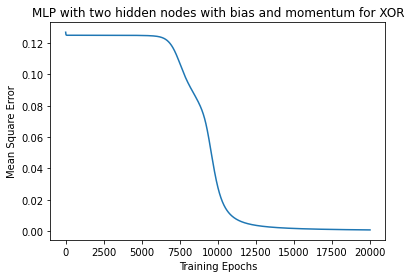

In [10]:
# Print the traget values and the networks predictions
print("Target outputs:", target)
print("Predicted outputs:", predicted_out)

# Set up the plot of the training error by epoch
plt.figure(4)
plt.xlabel('Training Epochs')
plt.ylabel('Mean Square Error')
plt.title('MLP with two hidden nodes with bias and momentum for XOR')
plt.plot(error_log)
plt.draw()

plt.show()  # keeping the plots alive until you close them